# Random Forest Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

## Importing the dataset

In [2]:
dataset = pd.read_csv('C:/Users/monis/Downloads/Churn_Modelling.csv')

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:ylabel='CreditScore'>

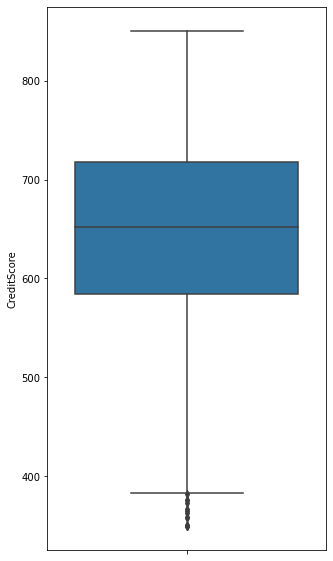

In [5]:
import seaborn as sns
plt.figure(figsize = (5,10))
sns.boxplot(y = 'CreditScore',data = dataset)

In [6]:
print(np.where(dataset['CreditScore']<400))

(array([   7,  942, 1193, 1201, 1405, 1631, 1838, 1962, 2473, 2579, 5285,
       5494, 6253, 8154, 8723, 8762, 9210, 9356, 9624], dtype=int64),)


In [7]:
dataset.drop([7,  942, 1193, 1201, 1405, 1631, 1838, 1962, 2473, 2579, 5285,
       5494, 6253, 8154, 8723, 8762, 9210, 9356, 9624],inplace = True)

In [8]:
print(dataset)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

<AxesSubplot:ylabel='CreditScore'>

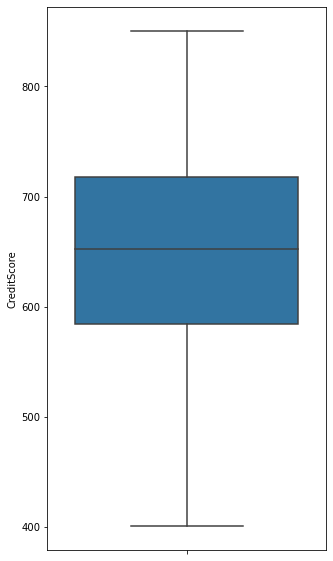

In [9]:
plt.figure(figsize = (5,10))
sns.boxplot(y = 'CreditScore',data = dataset)

<AxesSubplot:ylabel='Age'>

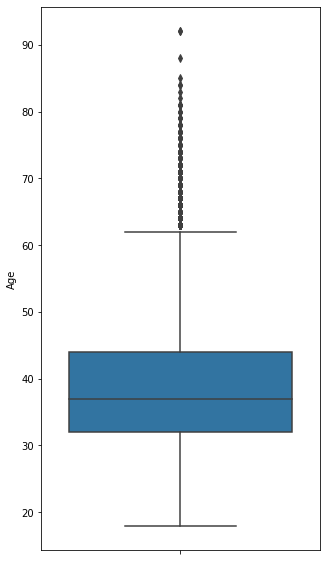

In [10]:
plt.figure(figsize = (5,10))
sns.boxplot(y = 'Age',data = dataset)

In [11]:
print(np.where(dataset['Age']>80))

(array([ 765, 2450, 3023, 3377, 3521, 4921, 6430, 6746, 7513, 7943, 9064,
       9292], dtype=int64),)


In [12]:
dataset.drop([732, 2346, 2894, 3228,6130, 6434, 7173, 7577, 8653, 8867],inplace = True)

In [13]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:ylabel='Tenure'>

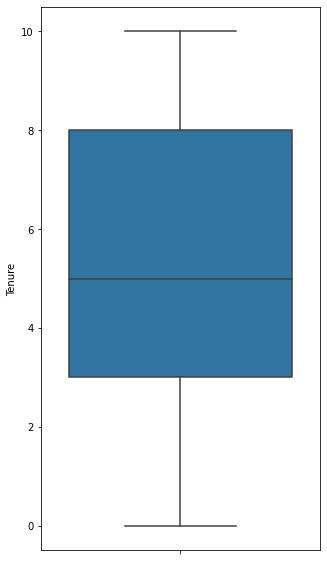

In [14]:
plt.figure(figsize = (5,10))
sns.boxplot(y = 'Tenure',data = dataset)

<AxesSubplot:ylabel='Balance'>

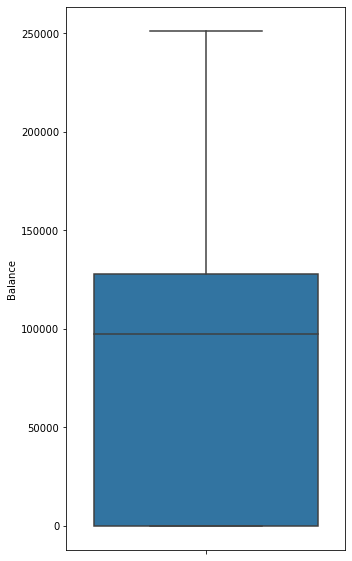

In [15]:
plt.figure(figsize = (5,10))
sns.boxplot(y = 'Balance',data = dataset)

<AxesSubplot:ylabel='EstimatedSalary'>

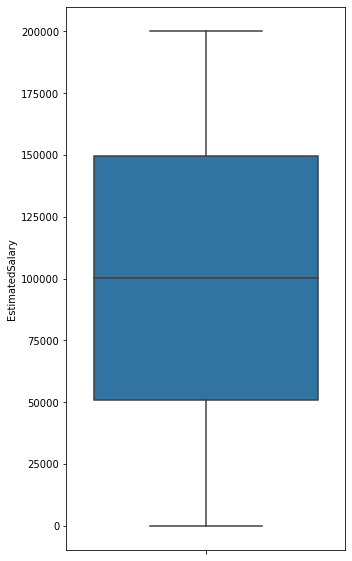

In [16]:
plt.figure(figsize = (5,10))
sns.boxplot(y = 'EstimatedSalary',data = dataset)

## Encoding categorical data

In [17]:
le = LabelEncoder()

In [18]:
dataset.Gender = le.fit_transform(dataset.Gender)

In [19]:
dataset.Gender

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 9971, dtype: int32

In [20]:
X = dataset.iloc[: , 3:13].values
y = dataset.iloc[:, -1].values

In [21]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [22]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [23]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[: , [0,5,6,7,11]] = sc.fit_transform(X_train[: , [0,5,6,7,11]])
X_test[: ,[0,5,6,7,11]] = sc.transform(X_test[: , [0,5,6,7,11]])

In [26]:
print(X_train)

[[-0.9987470236903478 0.0 1.0 ... 1 1 0.6149316690548668]
 [1.0012545482288626 0.0 0.0 ... 0 0 -0.4159057321832377]
 [1.0012545482288626 0.0 0.0 ... 0 0 -0.9065602409306105]
 ...
 [1.0012545482288626 0.0 0.0 ... 1 0 0.28000913821531737]
 [1.0012545482288626 0.0 0.0 ... 1 0 -0.17497233893557068]
 [1.0012545482288626 0.0 0.0 ... 1 1 0.7762138421486002]]


## Training the Random Forest Classification model on the Training set

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, max_features=1.0 ,min_samples_split=2,
                                    n_jobs = -1, max_depth=None, criterion = 'entropy',  random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=1.0, n_estimators=10,
                       n_jobs=-1, random_state=0)

## Predicting the test results

In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


## Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1497   91]
 [ 222  185]]


0.8431077694235589

## Hence, it is clear that Random Forest has the accuracy of 84.3% after pre-processing and scaling procedures 